In [ ]:
from surprise import Dataset, Reader, SVD, accuracy

# Sample data 
data = [
    (1, 101, 4.0, 106), (1, 102, 3.5, None), (1, 103, 5.0, 108),  
    (2, 101, 4.2, 107), (2, 104, 4.0, None), (3, 102, 4.5, None), (3, 105, 4.8, None)
]

reader = Reader(rating_scale=(1, 5), sep=',', skip_lines=1)  

dataset = Dataset.load_from_folds([(data, reader)], num_folds=1)

algo = SVD()
algo.fit(dataset.build_full_trainset())

user_id = 1
shirt_id = 101

user_ratings = dataset.all_ratings()[user_id]

n = 3
predictions = [ (algo.predict(user_id, other_shirt_id, None)[1]) for (other_shirt_id, rating, _) in user_ratings if other_shirt_id != shirt_id ]
predictions.sort(reverse=True)

recommended_pants = [item_id for user_id, shirt_id, rating, item_id in user_ratings if shirt_id != 101 and item_id is not None]  # Get pants co-purchased with other shirts

print("Top recommended pants for shirt", shirt_id, "based on similar shirt purchases:")
if recommended_pants:
  for pant_id in recommended_pants:
    print(pant_id)
else:
  print("No pants co-purchased with previously rated shirts.")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data 

shirts_id = [
  {"id": 101},
  {"id": 102},
  {"id": 103}
]

shirts = [
    {"id": 101, "color": "red", "style": "casual", "material": "cotton"},
    {"id": 102, "color": "blue", "style": "dressy", "material": "silk"},
    {"id": 103, "color": "white", "style": "casual", "material": "linen"}
]

pants = [
    {"id": 201, "color": "black", "style": "casual"},
    {"id": 202, "color": "beige", "style": "dressy"},
    {"id": 203, "color": "blue", "style": "casual"}
]

def extract_shirt_features(shirt):
  features = [shirt["color"], shirt["style"]]
  return " ".join(features)  

def extract_pant_features(pant):
  features = [pant["color"], pant["style"]]
  return " ".join(features)

shirt_features = [extract_shirt_features(shirt) for shirt in shirts]
pant_features = [extract_pant_features(pant) for pant in pants]

vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(shirt_features + pant_features)

def recommend_pants(shirt_id):
  shirt_index = shirts_id.index({"id": shirt_id})
  shirt_features_vector = tf_idf_matrix[shirt_index]
  similarities = shirt_features_vector.dot(tf_idf_matrix.T).toarray()[0]
  top_pants_indices = similarities.argsort()[-2:]  
  return [pants[i]["id"] for i in top_pants_indices]

chosen_shirt_id = 101

recommended_pants = recommend_pants(chosen_shirt_id)

print("Top recommended pants for shirt", chosen_shirt_id, "based on style and color:")
for pant_id in recommended_pants:
  print(pant_id)


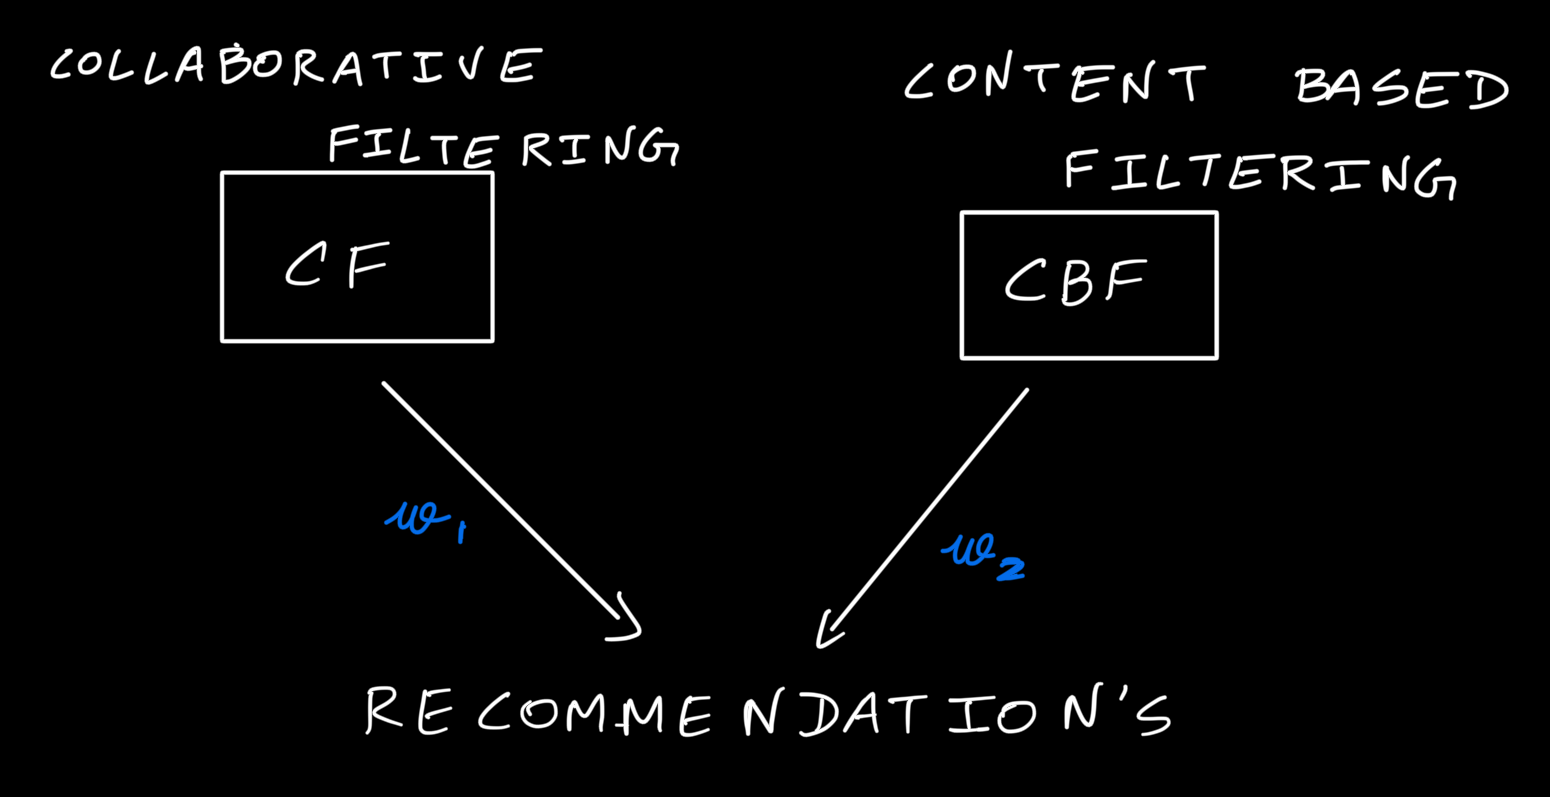